## Red Wine Quality Prediction Project
#### Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset contains only numerical data. We got 1599 rows and 12 columns, with 11 independent variable(features) and one ('quality') dependent/target variable (label). We got a classification model even if the label have more than 2 categories. 

## Exploratory Data Analysis (EDA)

In [3]:
# we check the dimension of the dataset using .shape matter. 
df.shape

(1599, 12)

In [4]:
# we can check the columns names and put them into a list using to_list() matter

df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

We can see that we have 12 columns and 1599 rows out of which 11 are features and "quality" is our label in this dataset. 

In [5]:
# we check the data type in our dataset using .dtypes matter. 

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

As I mention we have only numerical data in all the columns as float and integer in our target variable. This mean we don't have to convert the data using any encoding technique. 

In [6]:
# we check for the null values in columns using .isnull.sum() matter. 

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that we don't have any null value in our dataset. To be sure I will use heatmap and info matter for this. 

In [7]:
# checking the null values and getting more info using .info() matter. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

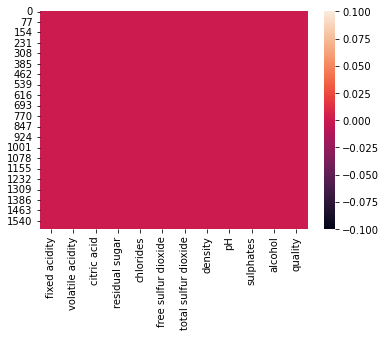

In [8]:
# checking the null values using heatmap

sns.heatmap(df.isnull())

We can conclude that we don't have null values in our dataset. 

In [9]:
# checking the value counts for all the columns 

for i in df.columns:
    print(df[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 1599, dtype: float64>


<bound method IndexOpsMixin.value_coun

In [10]:
# checking number of unique values in each column 
df.nunique().to_frame('No. of unique values')

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
# we check the min and max value with min and max matter

df['quality'].min()

3

In [14]:
df['quality'].max()

8

Our target variable data is categorical as we can see it have only 6 unique values and it is inbalanced regarding 4 out of 6 grades that are atributed to the wine quality. We can also see that are very few wines with 3 quality grade which is min and 8 which is max. 

### Description of the DataSet 

In [15]:
#statistical summary of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


With the describe matter we get a statistical description of the dataset out of which we can conclude couple of things:

1. We can see that all the columns have the same count values so there are no missing values in the dataset. 
2. We don't have any negative values. 
3. The mean values is greater than the median 50% except desnity where is a very very small difference (mean = 0.996747 vs 50% = 0.996750). If the mean is bigger than median it means that the data is skewed to the right. 
4. By analysing the 75% and max values we can see if we have outliers. If there is a big difference we have outliers for sure. We can see that for "residual sugar", "chlorides", "free sulfur dioxide", total sulfur dioxide" and "sulphates" maybe. 
5. We can also see the Standard Deviation, min values and 25% values for each column. 

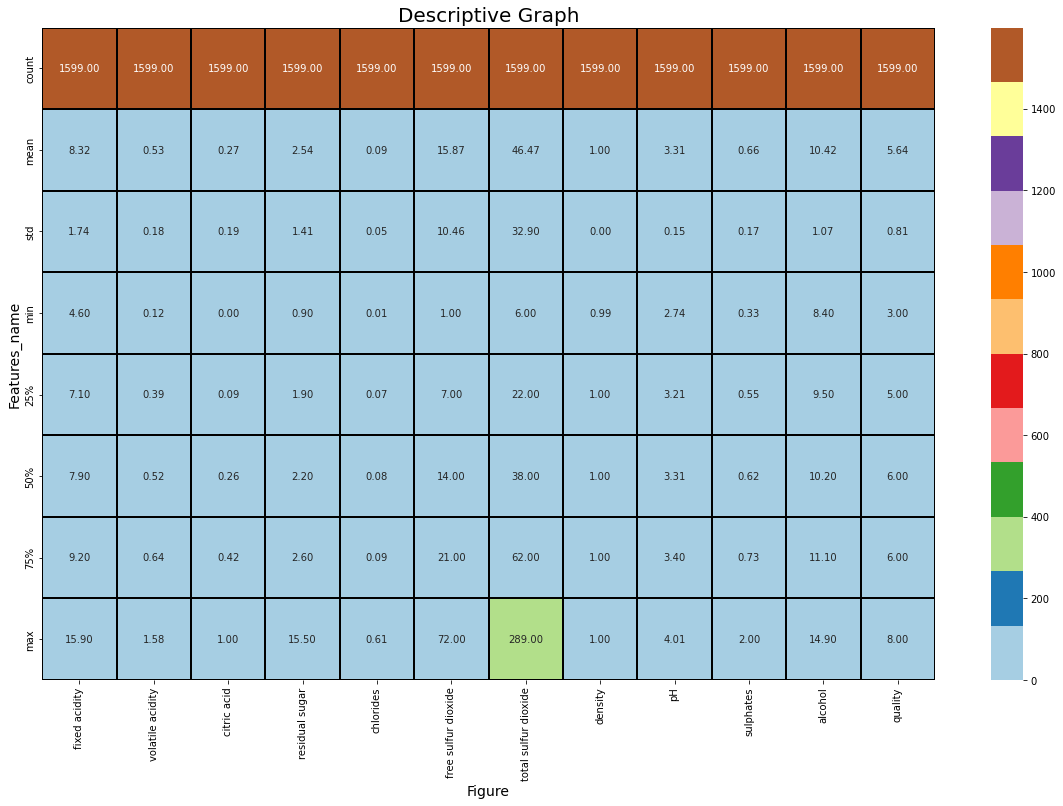

In [16]:
plt.figure(figsize = (20,12))
sns.heatmap(df.describe(), annot = True, fmt = '0.2f', linewidth = 0.1, linecolor = 'black', cmap = 'Paired')
plt.xlabel('Figure', fontsize = 14)      # fmt is about the number of decimal after .0 and annot show the values on the heatmap
plt.ylabel('Features_name', fontsize = 14)
plt.title('Descriptive Graph', fontsize = 20)
plt.show()

The heatmap doesn't help us very much. We can easily spot that "total sulfur dioxide" have a huge difference between max value and 75% quantile. 

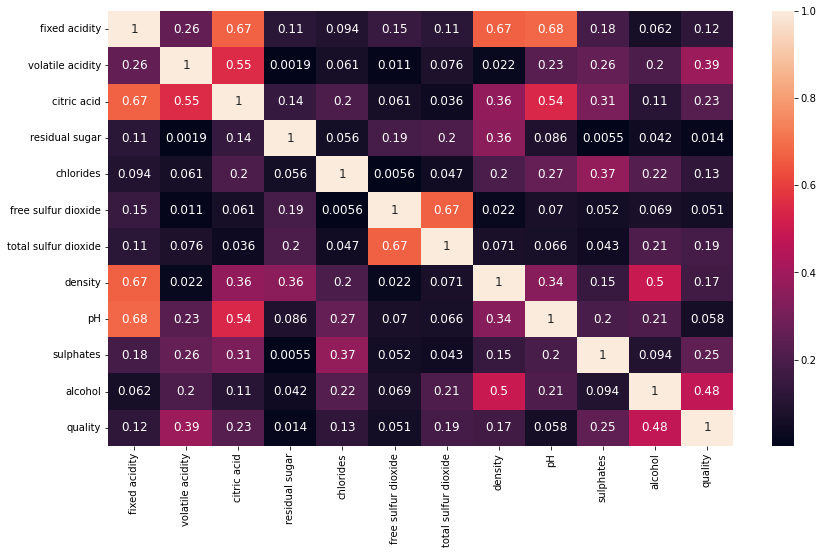

In [17]:
df_corr = df.corr().abs() # this code will get the coefficient of one variable vs all the variable 

plt.figure(figsize = (14, 8))
sns.heatmap(df_corr, annot = True, annot_kws = {'size':12})
plt.show()

Using .corr method applied on heatmap we can see very well which feature is correlated to which and in what grade. We can also see how each feature is correlate to our label. We can see that all the feature are important to the label and also that we dont't have a high correlation between features so we can conclude that we can't talk about multicoliniarity problem between any feature. 

In [18]:
df.corr()
# we can see also the correlation as a DataFrame 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


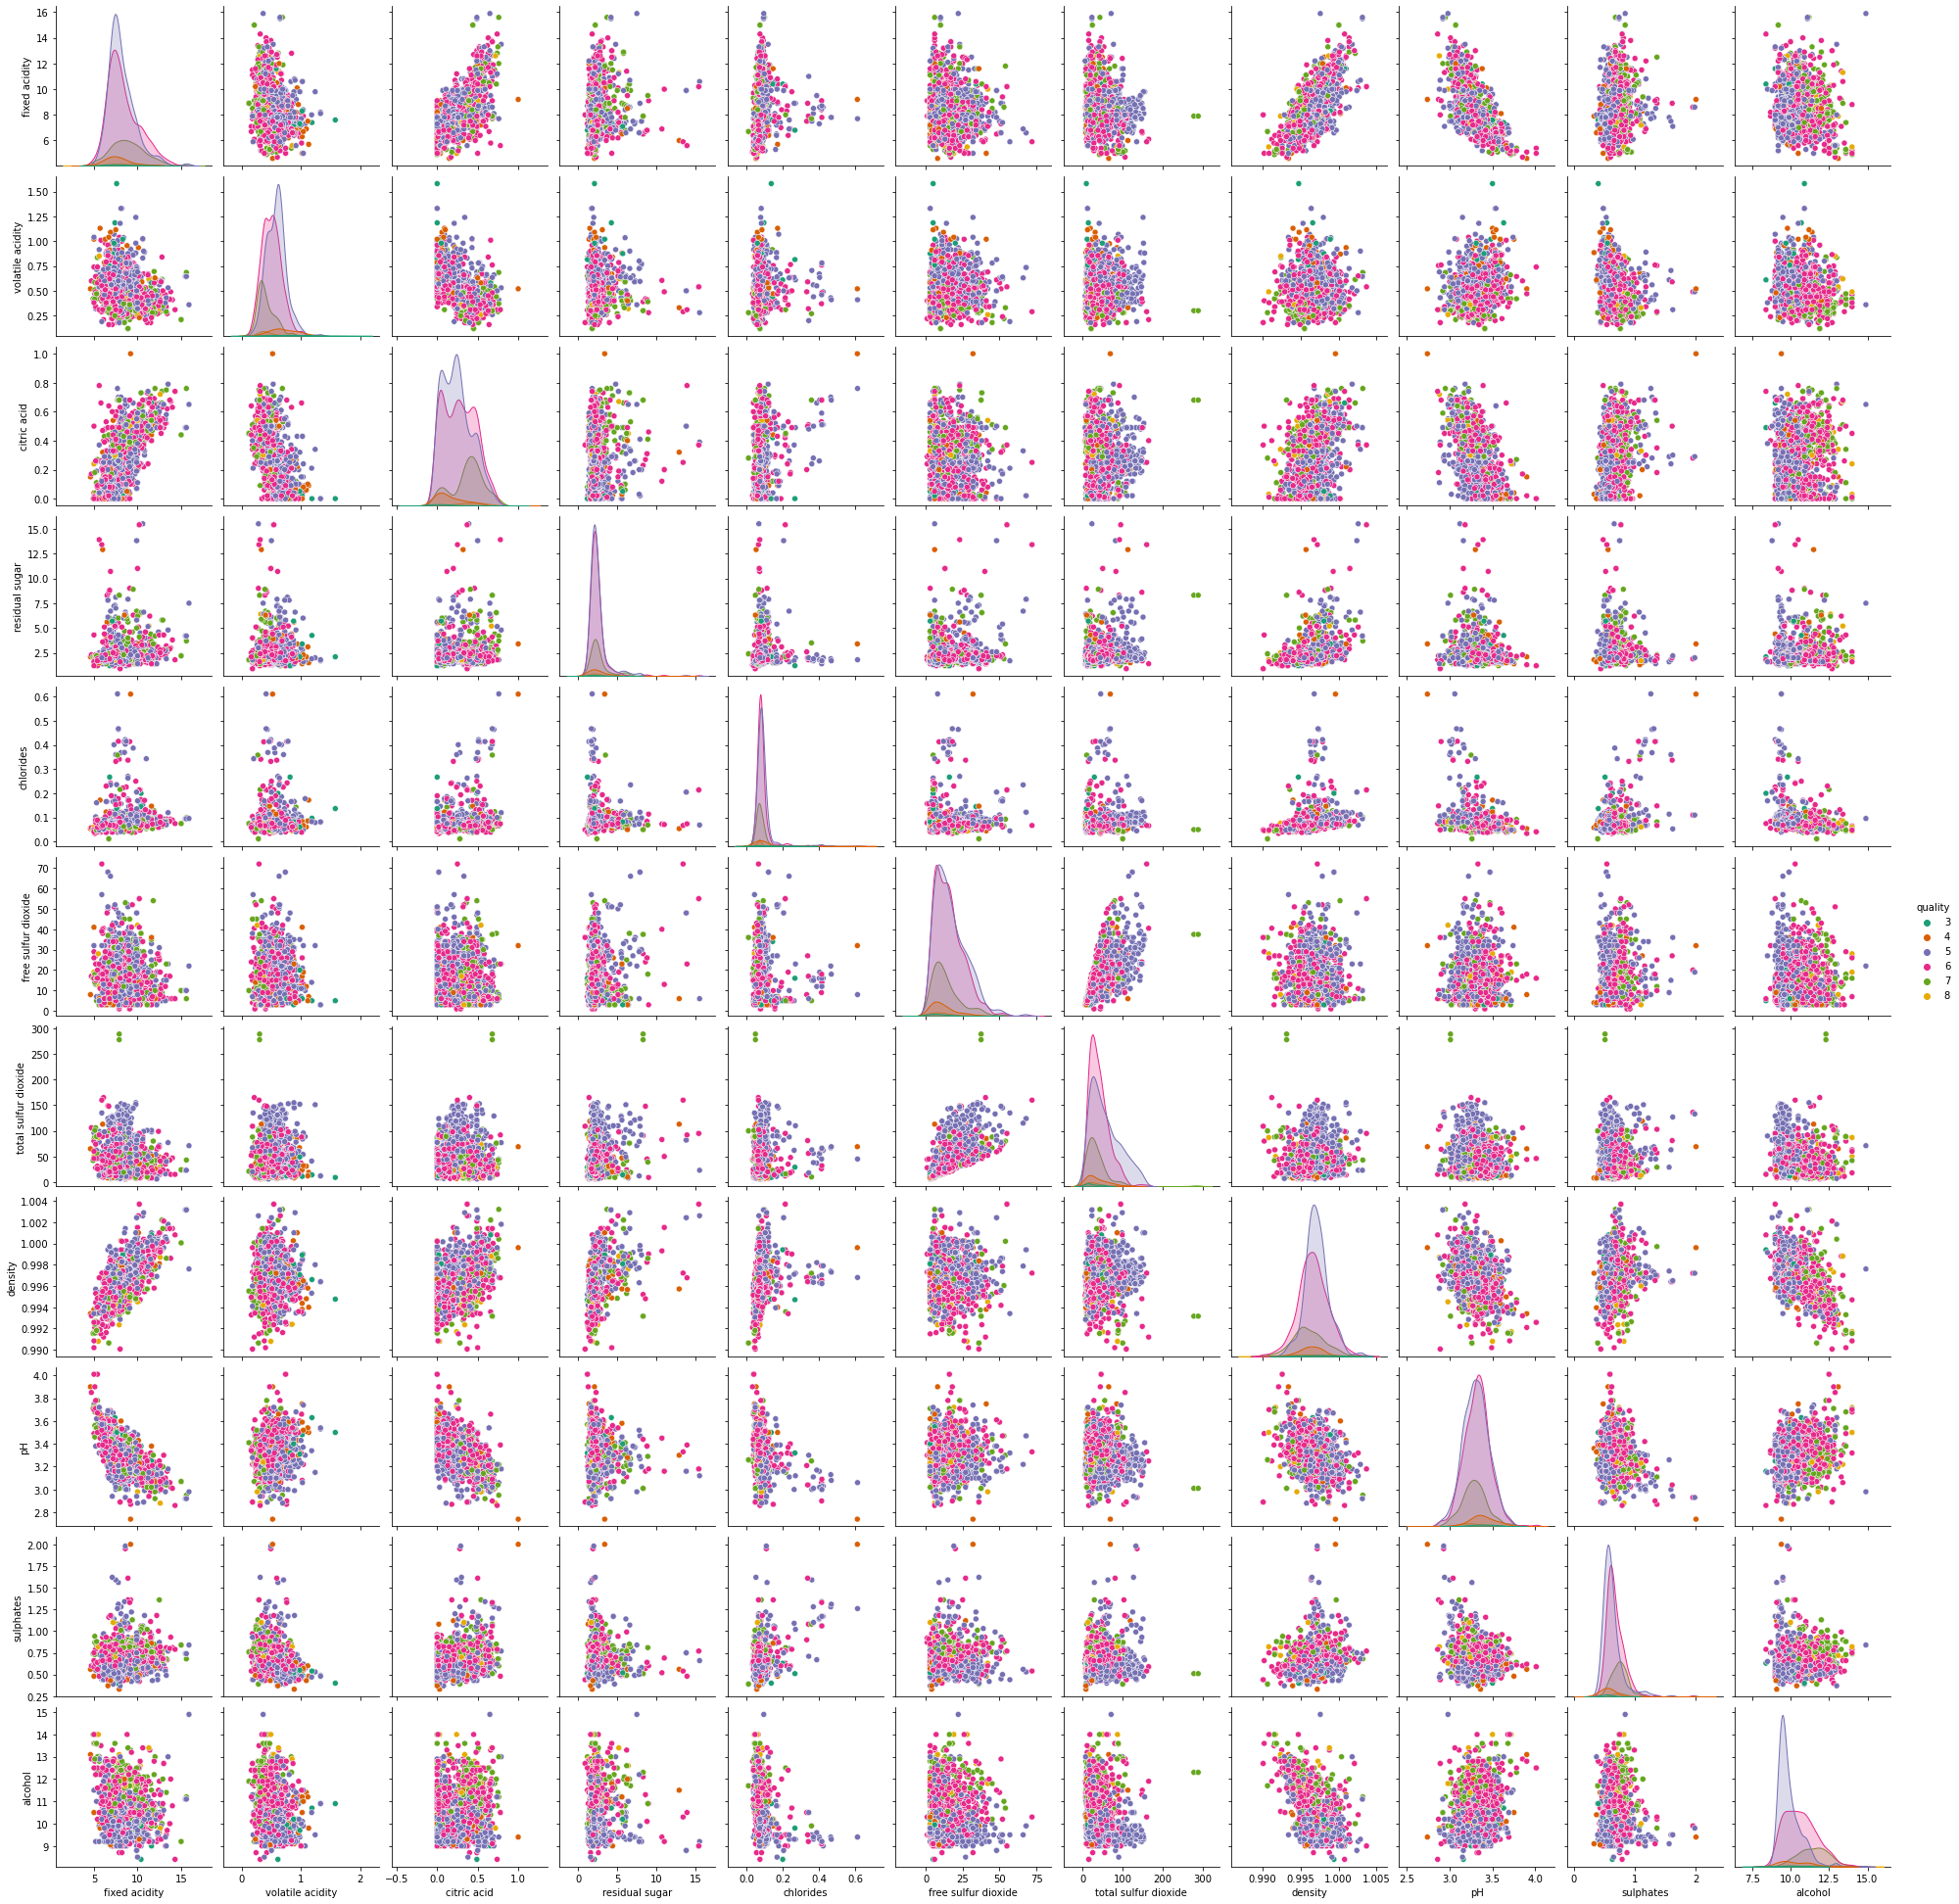

In [19]:
sns.pairplot(df, hue = 'quality', palette = 'Dark2')
plt.show()

1. The pairplot gives the pairwise relation between the features on the basis of the target 'Churn'. On the diagonal we can notice the distribution plots. 
2. We can't see any strong linear relation between features. 
3. We can see here that are a lot of outliers in some features. 

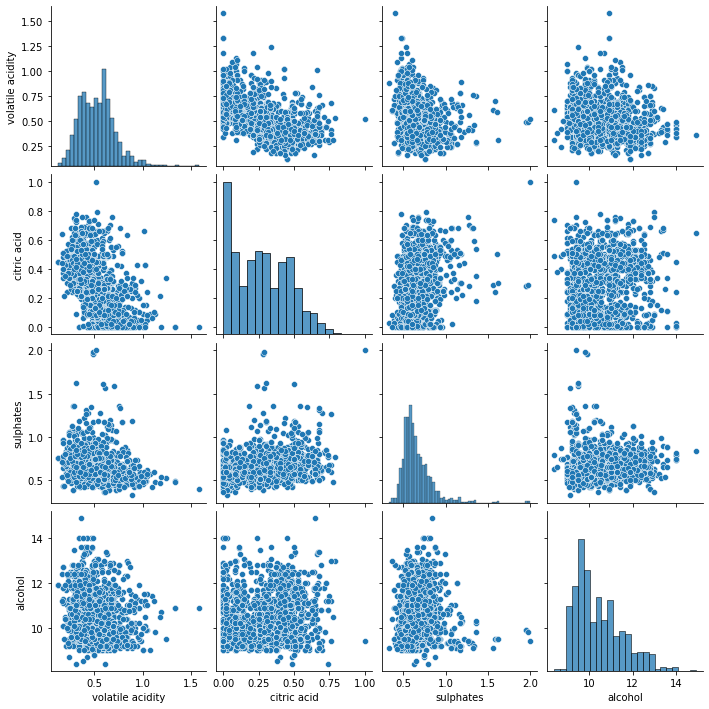

In [20]:
# if we want a better picture we can use pair plot just for the feature with a strong relation to the label.

sns.pairplot(df[['volatile acidity','citric acid','sulphates','alcohol']], palette = 'Dark2')
plt.show()

### Checking the outliers

Let's see if we get better correlation after we get rid of outliers.

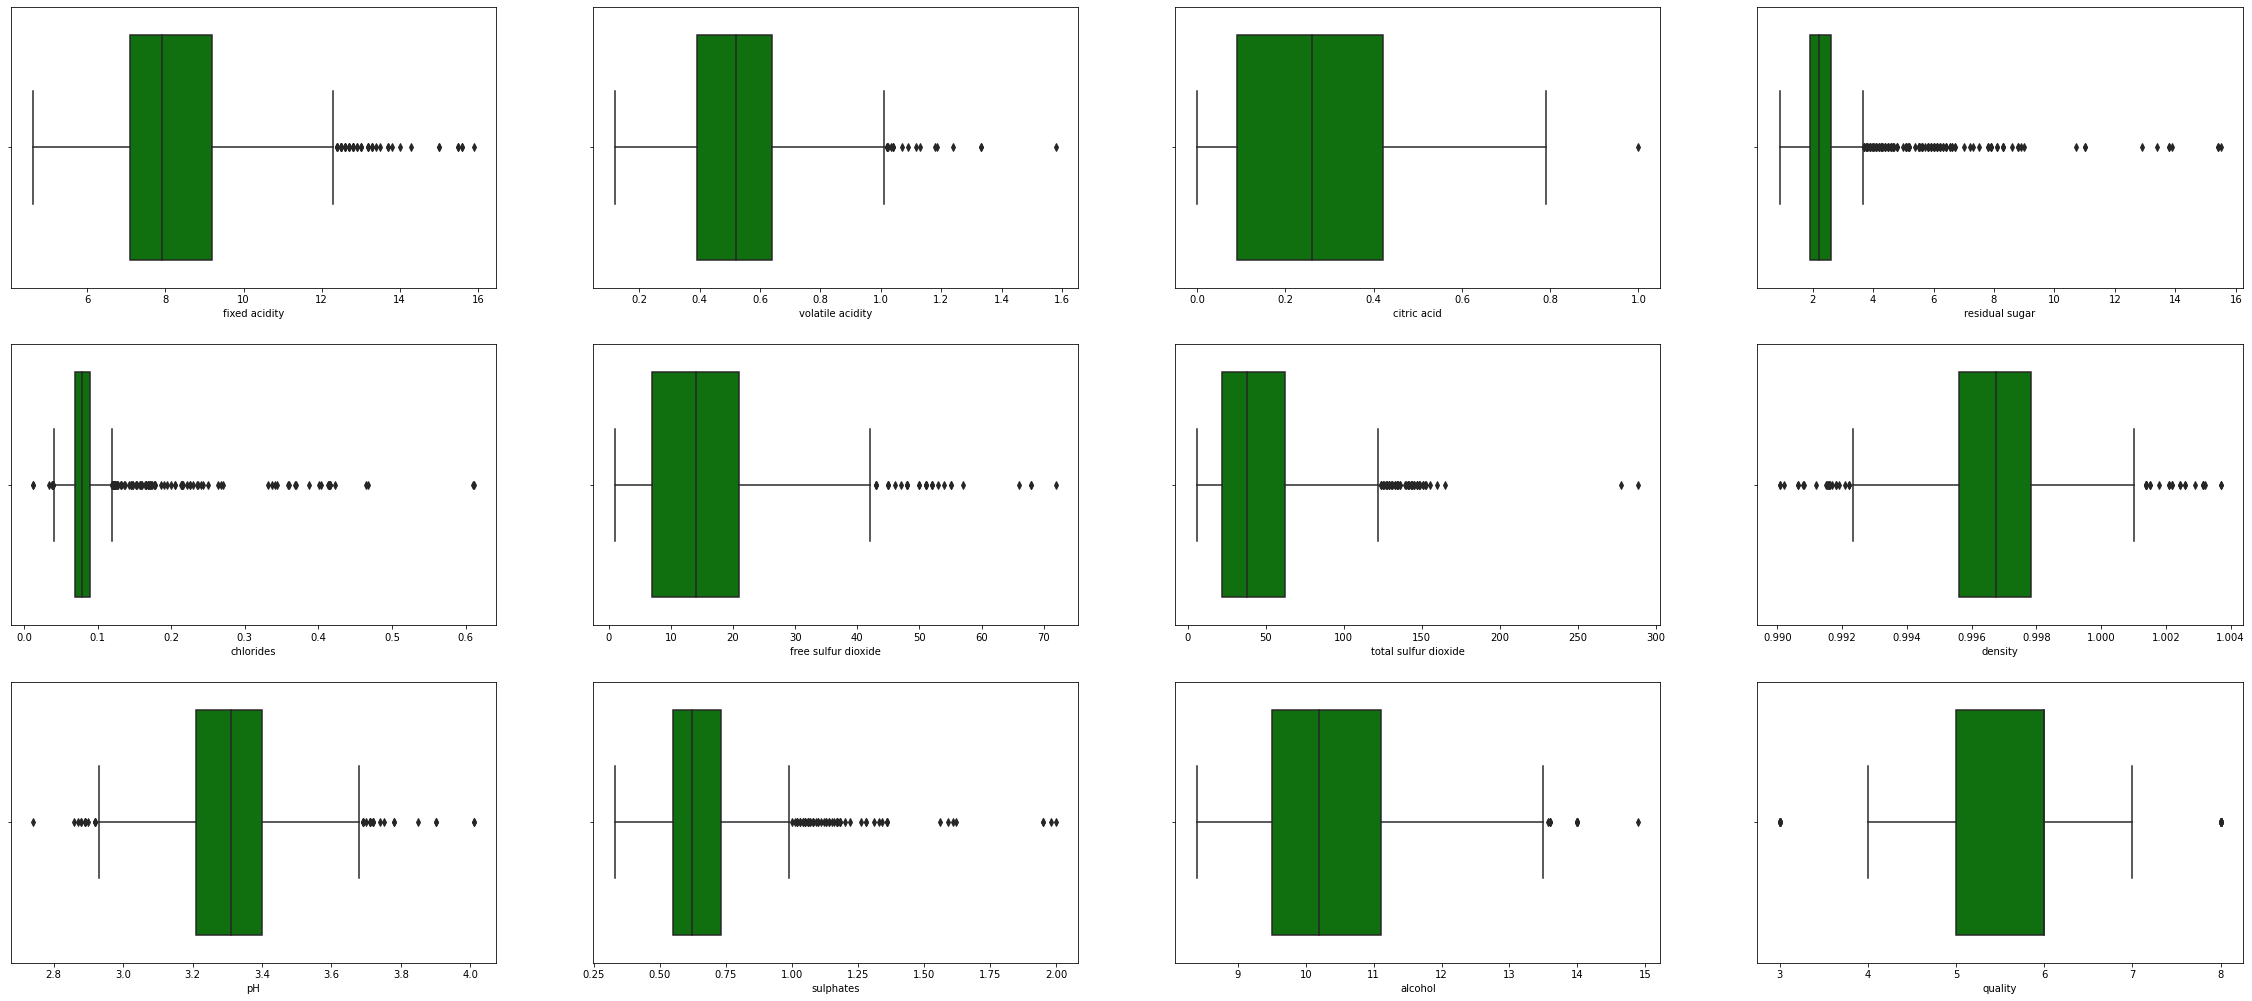

In [21]:
plt.figure(figsize = (40, 30))
p = 1
for i in df: 
    if p<=15:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], color = 'green', orient = 'v')
        plt.xlabel(i)
    p +=1
plt.show()

# here for some reason, it doesn't matter what comand i use, the boxplot is always horizonticaly.
# I tried orient = 'v', vert = True

We can see that in every column we got outliers. Let's find them exactly using zscore.

In [22]:
from scipy import stats
out_features = df # we dont put the target variable here. 
z=np.abs(stats.zscore(out_features)) # abs is the absolute matter. It transform any neagtive value into positive. 
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


The empirical rule we see that 99% of data is under 3 standard deviations from the mean value. So we set our threshold at 3. 

In [23]:
#threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

The first aray indicates the raw where we got outliers and the second one is the column. 

In [24]:
newdf = df[(z < 3).all(axis=1)]
newdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
# we checking the dataloss
print('Data Loss Precentage - ', ((df.shape[0]-newdf.shape[0])/df.shape[0])*100)

Data Loss Precentage -  9.255784865540964


In [26]:
# let's check the new dataframe using the describe matter. 
newdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


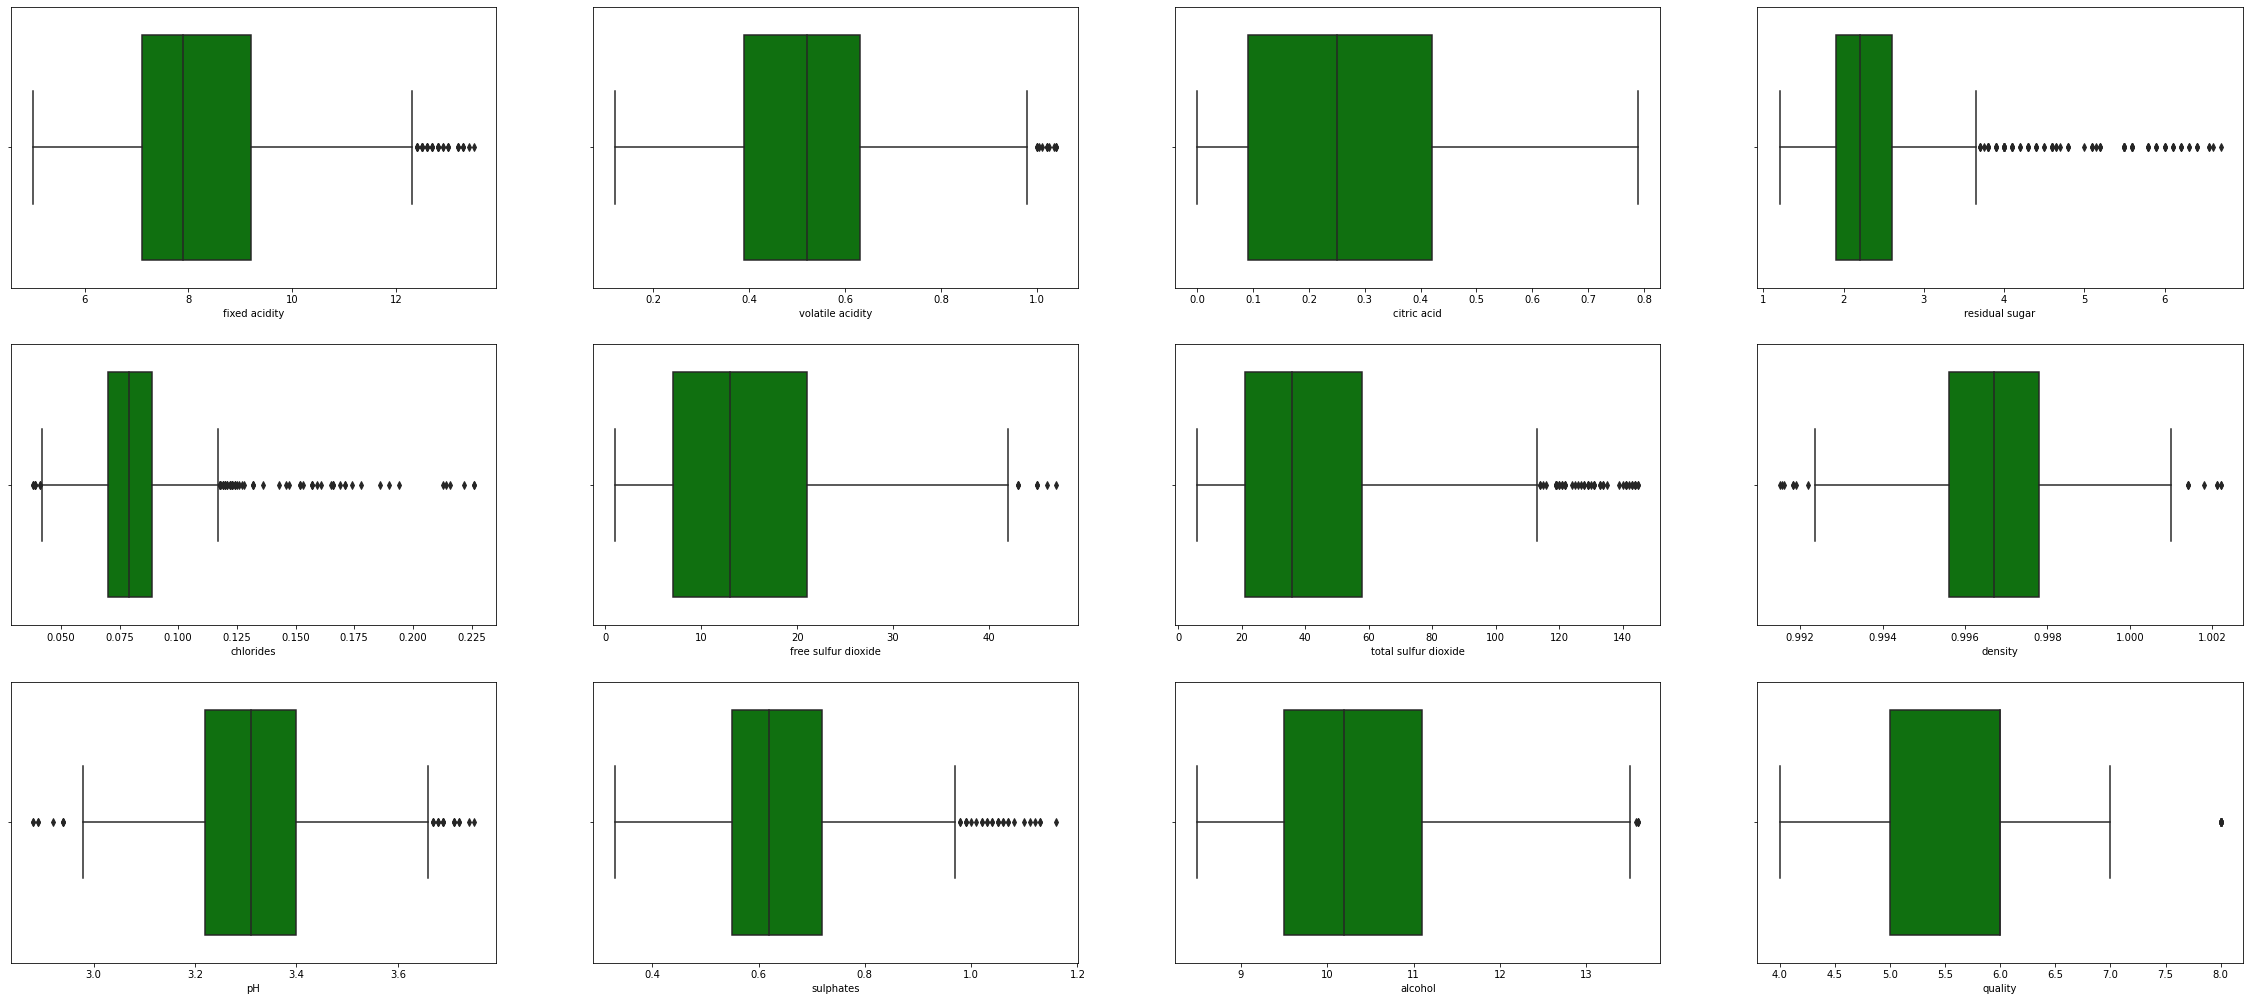

In [27]:
# let's see how it looks like using boxplot

plt.figure(figsize = (40, 30))
p = 1
for i in newdf: 
    if p<=15:
        plt.subplot(5,4,p)
        sns.boxplot(newdf[i], color = 'green', orient = 'v')
        plt.xlabel(i)
    p +=1
plt.show()

The data is looking better. We still have couple of outliers. I will go ahead like these to see how good my model will perform and try other matter after that to see if there's any improvement. 

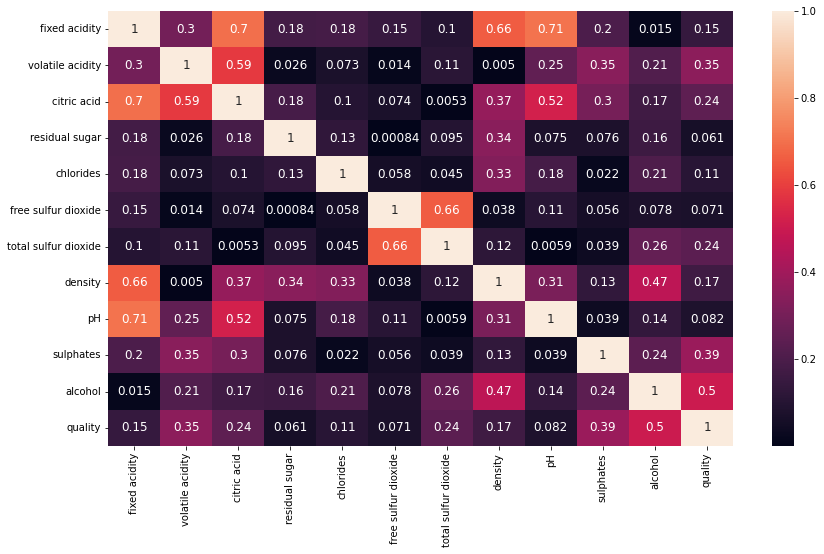

In [28]:
# lets see again the correlation between features using heatmap. 

newdf_corr = newdf.corr().abs()

plt.figure(figsize = (14, 8))
sns.heatmap(newdf_corr, annot = True, annot_kws = {'size':12})
plt.show()

Comparing to the first heatmap we can see improvements between features like "fixed acidity and "pH" or "density" and at a better look we can see a better correlation overall. This is a good sign. Also we dont have a very high correlation, a case for multicoliniarity. Let's go on! 

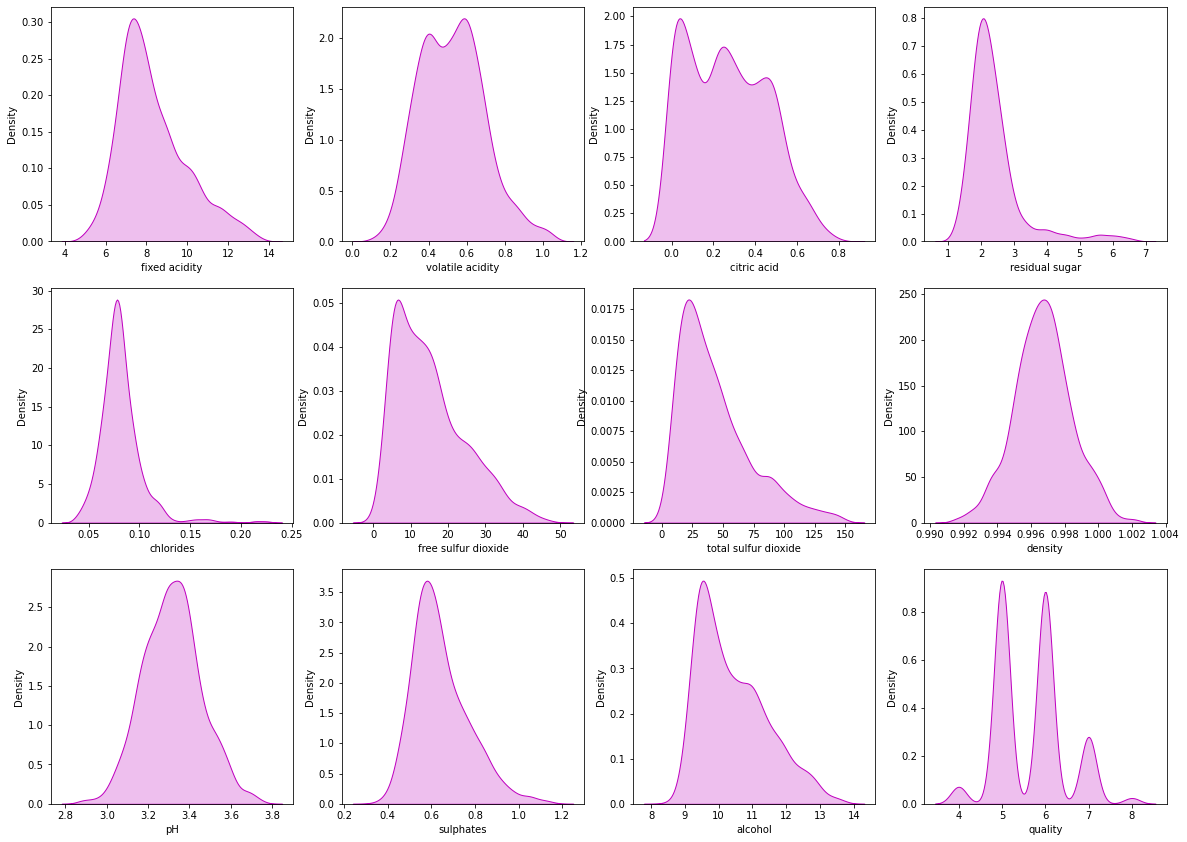

In [29]:
plt.figure(figsize = (20, 25))
p = 1
for i in newdf: 
    if p<=15:
        plt.subplot(5,4,p)
        sns.distplot(newdf[i], color = 'm', kde_kws = {'shade':True}, hist = False)
        plt.xlabel(i)
    p +=1
plt.show()

In [30]:
newdf.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [31]:
newdf.skew().mean()

0.8756939905952142

In [32]:
# let's try to remove skewness using .log matter. We will do this only for the column that have the skeweness bigger than 1.

newdf['residual sugar'] = np.log(newdf['residual sugar'])
newdf['chlorides'] = np.log(newdf['chlorides'])
newdf['total sulfur dioxide'] = np.log(newdf['total sulfur dioxide'])
newdf.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

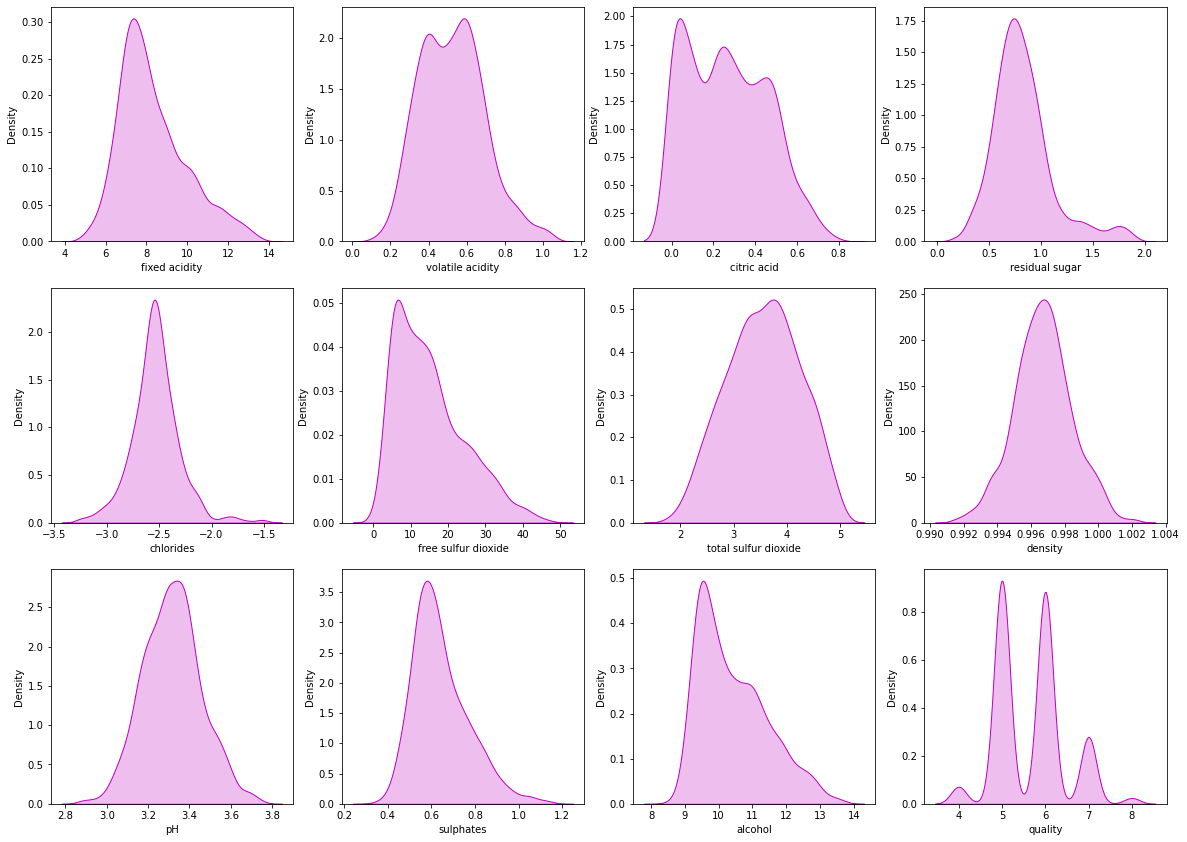

In [33]:
plt.figure(figsize = (20, 25))
p = 1
for i in newdf: 
    if p<=15:
        plt.subplot(5,4,p)
        sns.distplot(newdf[i], color = 'm', kde_kws = {'shade':True}, hist = False)
        plt.xlabel(i)
    p +=1
plt.show()

As the problem sugest in the begining I will try to introduce a new categorical column to separate the wine into good for quality above 7 and not good for quality under 7.  

In [34]:
newdf['wine classification'] = [0 if x < 7 else 1 for x in newdf['quality']]

In [35]:
newdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine classification
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,0.99547,3.57,0.71,10.2,5,0


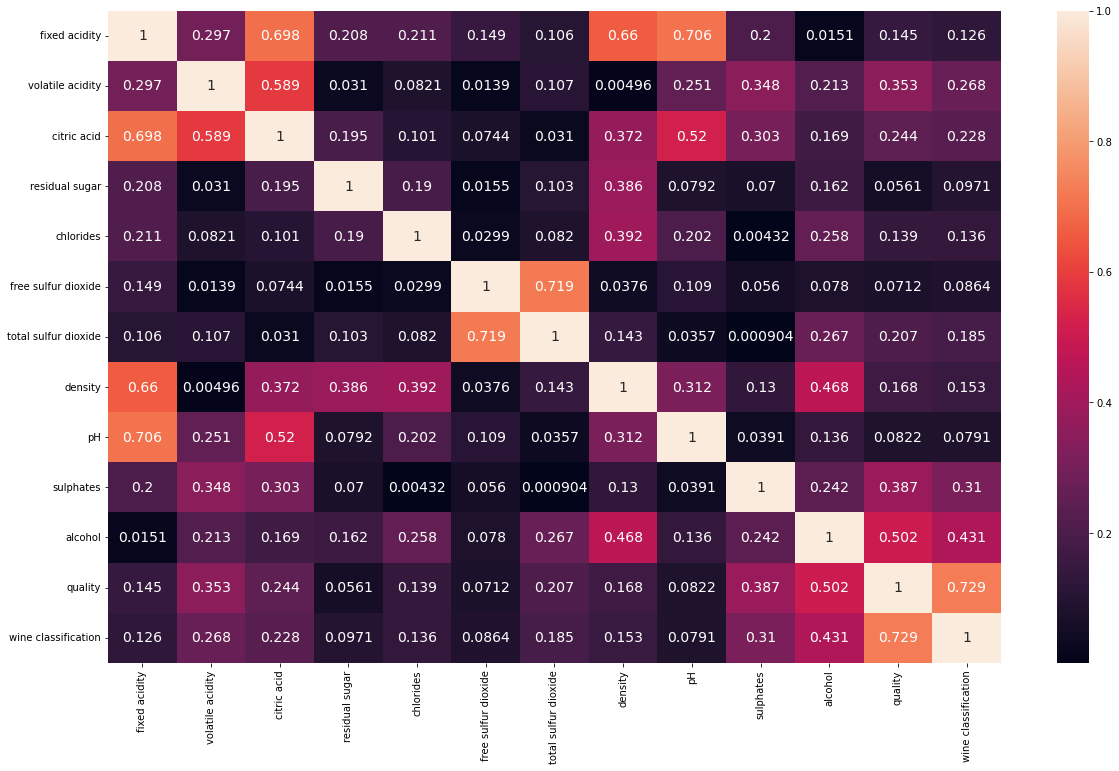

In [36]:
# lets see again the correlation via heatmap and if anything change after removing skeweness

newdf_corr = newdf.corr().abs()

plt.figure(figsize = (20, 12))
sns.heatmap(newdf_corr, annot = True, fmt = '.3g', annot_kws = {'size':14})
plt.show()

In [37]:
cor = newdf.corr()
cor['quality'].sort_values(ascending=False)

quality                 1.000000
wine classification     0.728804
alcohol                 0.501501
sulphates               0.386567
citric acid             0.243999
fixed acidity           0.145163
residual sugar          0.056116
free sulfur dioxide    -0.071202
pH                     -0.082164
chlorides              -0.138821
density                -0.167568
total sulfur dioxide   -0.206877
volatile acidity       -0.353443
Name: quality, dtype: float64

We can conclude that "alcohol','sulphates','citric acid' and 'volatile acidity' have the strongest correlation with our target variable, 'alcohol' being on top with 50% folowed by 'sulphates' with 40%, 'volatile acidity' with -35% and 'citric acid' with 24%.

Text(33.1440625, 0.5, 'Alcohol Level')

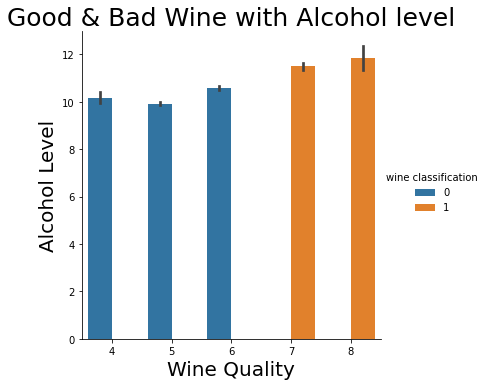

In [38]:
# let's see the correlation between alcohol percentage and the quality of the wine

sns.catplot(x="quality", y="alcohol", hue="wine classification", kind="bar", data=newdf);

plt.title('Good & Bad Wine with Alcohol level',size=25)
plt.xlabel('Wine Quality',size=20)
plt.ylabel('Alcohol Level',size=20)

We can observe that good wines tend to have a higher level of alcohol than the bad ones. 

Text(34.04458333333334, 0.5, 'Sulphates Level')

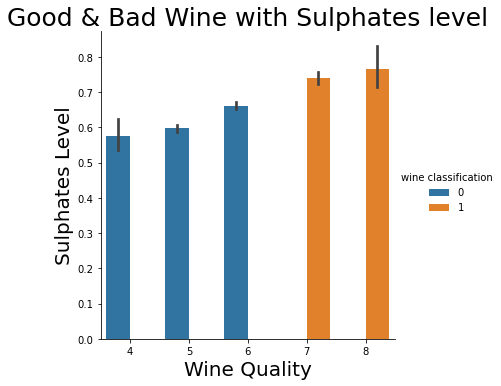

In [39]:
sns.catplot(x="quality", y="sulphates", hue="wine classification", kind="bar", data=newdf);

plt.title('Good & Bad Wine with Sulphates level',size=25)
plt.xlabel('Wine Quality',size=20)
plt.ylabel('Sulphates Level',size=20)

We can see that highest level of sulphates indicates a good wine. 

Text(34.04458333333334, 0.5, 'Volatile acidity Level')

<Figure size 1440x1440 with 0 Axes>

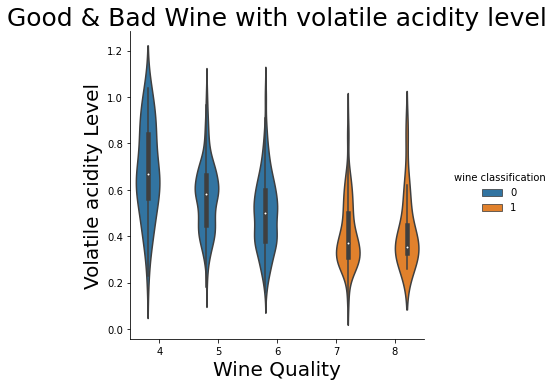

In [40]:
plt.figure(figsize=(20,20))
sns.catplot(x="quality", y="volatile acidity", hue="wine classification", kind="violin", data=newdf);

plt.title('Good & Bad Wine with volatile acidity level',size=25)
plt.xlabel('Wine Quality',size=20)
plt.ylabel('Volatile acidity Level',size=20)

This graph shows us that lower acidity level makes a wine better than high level of volatile acidity. 

Text(34.04458333333334, 0.5, 'Citric acid Level')

<Figure size 1584x1440 with 0 Axes>

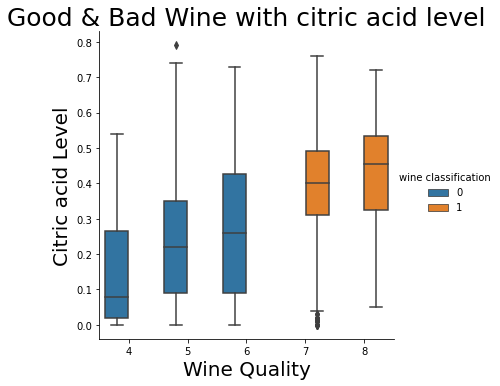

In [41]:
plt.figure(figsize=(22,20))
sns.catplot(x="quality", y="citric acid", hue="wine classification", kind="box", data=newdf);

plt.title('Good & Bad Wine with citric acid level',size=25)
plt.xlabel('Wine Quality',size=20)
plt.ylabel('Citric acid Level',size=20)

We can observe in this graph that a low level of citric acid makes a wine bad and as the citric acid level goes up the wine quality start to rise as well. 

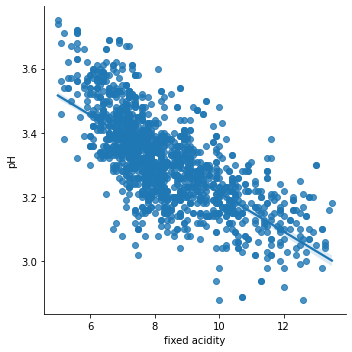

In [42]:
# lets see the corelation between some high correlated features as we seen in heatmap using lmplot.

sns.lmplot(x ='fixed acidity', y = 'pH', data = newdf, palette = 'colorblind')

we can see a good correlation. most of the data being around the best fit line. 

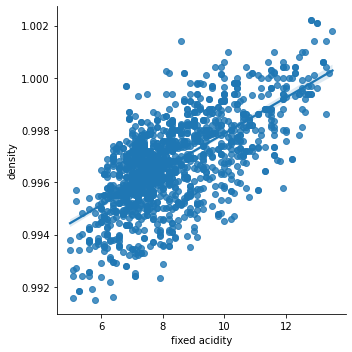

In [43]:
sns.lmplot(x ='fixed acidity', y = 'density', data = newdf, palette = 'colorblind')

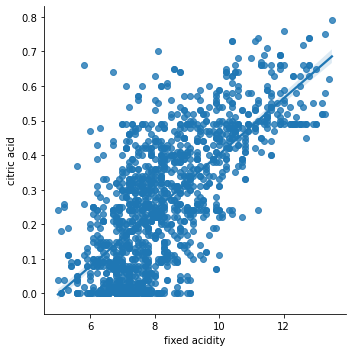

In [44]:
sns.lmplot(x ='fixed acidity', y = 'citric acid', data = newdf, palette = 'colorblind')

We can observe most of the data for those features come close to the bestfit line as  they have a corr score higher than 60%. Let's see a correlation between our target and density because of it's good correlation with citric acid and fixed acidy which we saw that contribute to a good wine. 

Text(37.57739583333334, 0.5, 'Density Level')

<Figure size 1440x1440 with 0 Axes>

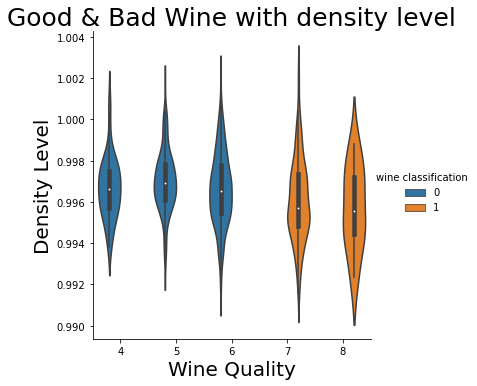

In [45]:
plt.figure(figsize=(20,20))
sns.catplot(x="quality", y="density", hue="wine classification", kind="violin", data=newdf);

plt.title('Good & Bad Wine with density level',size=25)
plt.xlabel('Wine Quality',size=20)
plt.ylabel('Density Level',size=20)

### Couple of conclusion

From the graphs above we can conclude that a good red wine have a high alcohol concentration with high sulphates in combination with low volatile acidity but high citric acidity. Regarding the density correlation with the wine quality we can say only that bad wines have a medium density. 

## Preparing the model
### Separate the target from the feature variables

In [46]:
newdf.drop('wine classification', axis = 1, inplace = True)
x = newdf.drop('quality', axis = 1)
y = newdf['quality']

In [47]:
print(x.shape)
print(y.shape)

(1451, 11)
(1451,)


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 100)

## Feature Scaling using Standard Scalarization

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Find the best random state

In [50]:
# finding the best Random State 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.7477064220183486 at random_State 27


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
# Checking accuracy for RandomForestClasifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7431192660550459
[[  0   5   7   0   0]
 [  0 154  24   2   0]
 [  0  36 137   6   0]
 [  0   3  25  32   0]
 [  0   0   3   1   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.78      0.86      0.81       180
           6       0.70      0.77      0.73       179
           7       0.78      0.53      0.63        60
           8       1.00      0.20      0.33         5

    accuracy                           0.74       436
   macro avg       0.65      0.47      0.50       436
weighted avg       0.73      0.74      0.73       436



In [54]:
# Checking the accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.6238532110091743
[[  0   7   5   0   0]
 [  0 142  38   0   0]
 [  0  57 115   7   0]
 [  0   3  42  15   0]
 [  0   0   2   3   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.68      0.79      0.73       180
           6       0.57      0.64      0.60       179
           7       0.60      0.25      0.35        60
           8       0.00      0.00      0.00         5

    accuracy                           0.62       436
   macro avg       0.37      0.34      0.34       436
weighted avg       0.60      0.62      0.60       436



In [55]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.6674311926605505
[[  0   6   6   0   0]
 [  0 150  30   0   0]
 [  0  52 120   7   0]
 [  0   3  36  21   0]
 [  0   0   3   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.71      0.83      0.77       180
           6       0.62      0.67      0.64       179
           7       0.70      0.35      0.47        60
           8       0.00      0.00      0.00         5

    accuracy                           0.67       436
   macro avg       0.41      0.37      0.38       436
weighted avg       0.64      0.67      0.64       436



In [56]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.6926605504587156
[[  1   7   4   0   0]
 [  2 149  28   1   0]
 [  1  41 119  18   0]
 [  0   3  25  32   0]
 [  0   1   1   2   1]]
              precision    recall  f1-score   support

           4       0.25      0.08      0.12        12
           5       0.74      0.83      0.78       180
           6       0.67      0.66      0.67       179
           7       0.60      0.53      0.57        60
           8       1.00      0.20      0.33         5

    accuracy                           0.69       436
   macro avg       0.65      0.46      0.50       436
weighted avg       0.68      0.69      0.68       436



In [57]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.75
[[  0   4   8   0   0]
 [  0 153  27   0   0]
 [  0  32 142   5   0]
 [  0   3  26  31   0]
 [  0   1   3   0   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.79      0.85      0.82       180
           6       0.69      0.79      0.74       179
           7       0.86      0.52      0.65        60
           8       1.00      0.20      0.33         5

    accuracy                           0.75       436
   macro avg       0.67      0.47      0.51       436
weighted avg       0.74      0.75      0.73       436



In [58]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7201834862385321
[[  0   4   8   0   0]
 [  0 149  29   0   2]
 [  2  39 130   7   1]
 [  0   6  20  34   0]
 [  0   0   2   2   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.75      0.83      0.79       180
           6       0.69      0.73      0.71       179
           7       0.79      0.57      0.66        60
           8       0.25      0.20      0.22         5

    accuracy                           0.72       436
   macro avg       0.50      0.46      0.48       436
weighted avg       0.70      0.72      0.71       436



In [59]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.3577981651376147
[[ 2  3  7  0  0]
 [95 43 38  4  0]
 [28 38 98 12  3]
 [ 1  3 40 13  3]
 [ 0  0  1  4  0]]
              precision    recall  f1-score   support

           4       0.02      0.17      0.03        12
           5       0.49      0.24      0.32       180
           6       0.53      0.55      0.54       179
           7       0.39      0.22      0.28        60
           8       0.00      0.00      0.00         5

    accuracy                           0.36       436
   macro avg       0.29      0.23      0.23       436
weighted avg       0.48      0.36      0.39       436



Our best model is ExtraTreesClassifier with 75% performance. Lets find the best params for it. 

In [60]:
# ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [10,20,30],
              'random_state':[10, 50,100, 500, 1000],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]}

In [61]:
GCV= GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [62]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 100, 500, 1000]})

In [63]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 500}

In [68]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 30, n_estimators = 100 , n_jobs = -5, random_state = 27)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

74.54128440366972


In [69]:
import joblib
joblib.dump(Final_model, 'Red Wine Quality Prediction Project.pkl')

['Red Wine Quality Prediction Project.pkl']